PRIMERO REALIZAMOS LA CONVERSIÓN TXT A CSV A PARTIR DE UN DISPOSITIVO

el archivo csv se guarda en la carpeta CSV

In [11]:
import os
import pandas as pd


#

dispositivo = 'refrigerador' #CAMBIA AL DISPOSITIVO EL CUAL REQUIERES 
variable = 'Corriente_linea1' #CAMBIA LA VARIALE AL CUAL QUIERES CONCATENAR USALMENTE ES CORRIENTE



directory = f"Dispositivos/{dispositivo}/{variable}"
output_csv = f"Dispositivos_CSV/{dispositivo}_{variable}.csv" #NO CAMBIAR ES LA RUTA DE SALIDA



def concat_txt_to_csv(directory, output_csv):
    # Lista para almacenar los datos de todos los archivos
    data_frames = []
    
    # ITERAR SOBRE LOS ARCHIVO DE LA CARPETA
    for file in os.listdir(directory):
        if file.endswith(".txt"):
            file_path = os.path.join(directory, file)
            print(f"Leyendo archivo: {file_path}")
            
            # LEER CADA ARCHIVOS TXT EN UN DATAFRAME
            df = pd.read_csv(file_path, header=None)  # Ajusta el delimitador si es necesario
            data_frames.append(df)
    
    # CONCATENAR TODOS LOS ARCHIVOS ES UNO 
    combined_df = pd.concat(data_frames, ignore_index=True)
    
    # GUARDAR DATA FRAME Y GUARDARLO EN UN CSV
    combined_df.to_csv(output_csv, index=False, header=False)
    print(f"Archivos concatenados guardados en: {output_csv}")

concat_txt_to_csv(directory, output_csv)




Leyendo archivo: Dispositivos/refrigerador/Corriente_linea1\2024-09-25 10.txt
Leyendo archivo: Dispositivos/refrigerador/Corriente_linea1\2024-09-25 11.txt
Archivos concatenados guardados en: Dispositivos_CSV/refrigerador_Corriente_linea1.csv


VISUALIZACIÓN DE NUETRO CSV NUEVO

In [12]:
import pandas as pd


df= pd.read_csv(f"Dispositivos_CSV/{dispositivo}_{variable}.csv")
df.columns = ['fecha', f"{variable}"]
df.to_csv(f"Dispositivos_CSV/{dispositivo}_{variable}.csv", index=False)


print(df.head())

                  fecha  Corriente_linea1
0  2024-09-25 10-00-1.5          0.321618
1  2024-09-25 10-00-2.3          0.320952
2  2024-09-25 10-00-3.1          0.318872
3  2024-09-25 10-00-3.9          0.318872
4  2024-09-25 10-00-4.7          0.320654


ACOMODAR FORMATO DE FECHA Y GUARDAR ARCHIVO EN CARPETA DE DISPOSITIVOS ENTRENAMIENTO




VERIFICAR EL FORMATO QUE TIENE TU FECHA ANTERIOR A PARTIR DE ELLO SE MODIFICA LA LINEA
Reemplazar el espacio por un guion bajo
data['fecha'] = data['fecha'].str.replace(' ', '_')

In [13]:
import pandas as pd


# Cargar los datos desde un archivo CSV (ajusta la ruta si es necesario)
data = pd.read_csv(f"Dispositivos_CSV/{dispositivo}_{variable}.csv")


# Eliminar los microsegundos (elimina la parte después del último punto)
data['fecha'] = data['fecha'].str.replace(r'\.\d+$', '', regex=True)

# Reemplazar el espacio por un guion bajo
data['fecha'] = data['fecha'].str.replace(' ', '_') #s  para re

# Reemplazar el espacio por un guion bajo
#data['fecha'] = data['fecha'].str.replace(':', '-') # s Para v

# # Convertir la cadena a datetime
# data['fecha'] = pd.to_datetime(data['fecha'], format='%Y-%m-%d_%H-%M-%S')

# Guardar el resultado en un nuevo archivo CSV
data.to_csv(f"Dispositivos_Entrenamiento/{dispositivo}_Entrenamiento.csv", index=False)



In [14]:
print(data.head())

                fecha  Corriente_linea1
0  2024-09-25_10-00-1          0.321618
1  2024-09-25_10-00-2          0.320952
2  2024-09-25_10-00-3          0.318872
3  2024-09-25_10-00-3          0.318872
4  2024-09-25_10-00-4          0.320654


VER COMPORTAMIENTO

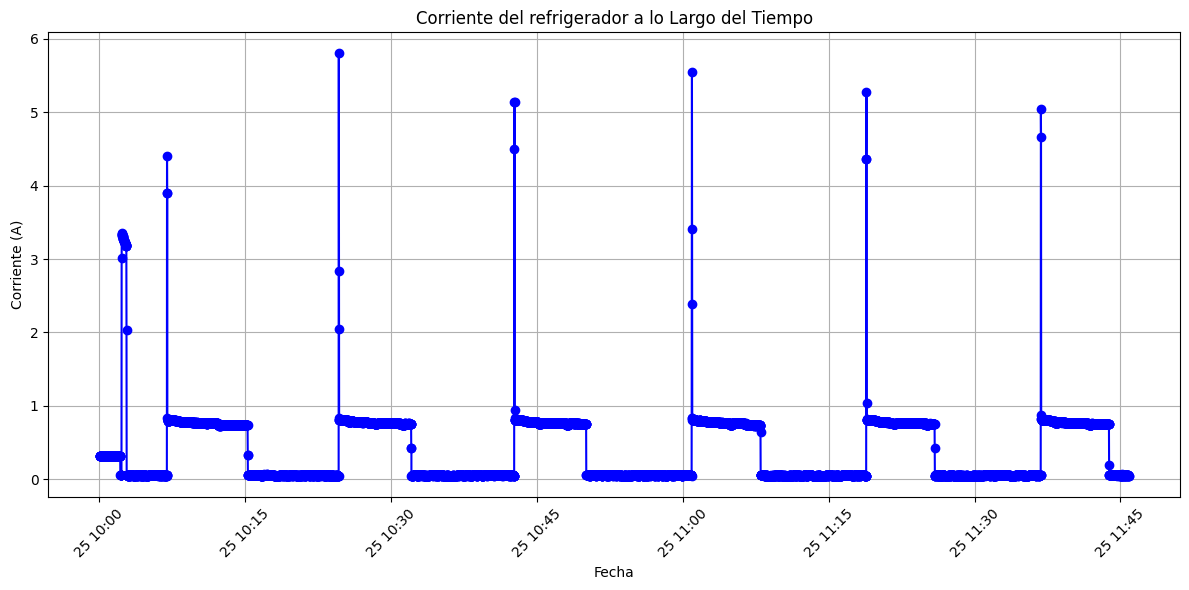

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde un archivo CSV (ajusta la ruta si es necesario)
data = pd.read_csv(f"Dispositivos_Entrenamiento/{dispositivo}_Entrenamiento.csv")

if not isinstance(data['fecha'], pd.DatetimeIndex):
    data['fecha'] = pd.to_datetime(data['fecha'], format='%Y-%m-%d_%H-%M-%S', errors='coerce')
# Graficar
plt.figure(figsize=(12, 6))
plt.plot(data['fecha'], data['Corriente_linea1'], marker='o', linestyle='-', color='b')
plt.title(f"Corriente del {dispositivo} a lo Largo del Tiempo")
plt.xlabel('Fecha')
plt.ylabel('Corriente (A)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()

# Mostrar la gráfica
plt.show()


In [16]:
print(min(data['fecha']))
print(max(data['fecha']))

2024-09-25 10:00:01
2024-09-25 11:45:50
